In [1]:
import pandas as pd
import ruptures as rpt
import numpy as np

df_PMI_V = pd.read_csv('PMI_V_train.csv',index_col = 0)
df_PMI_A = pd.read_csv('PMI_A_train.csv',index_col = 0)

df_NGD_V = pd.read_csv('NGD_V_train.csv',index_col = 0)
df_NGD_A = pd.read_csv('NGD_A_train.csv',index_col = 0)

df_PMI_V

,0,1,2,3,4,5,6,7,8,9,...,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835
0,-0.899155,0.604922,0.669461,0.892604,-0.206008,0,0,0.892604,0,0.199457,...,0.892604,0,0.892604,0.892604,0,0,0,0,-0.206008,0.892604
1,-0.542480,0.961597,1.026136,1.249279,0.150667,0,0,1.249279,0,0.556132,...,1.249279,0,1.249279,1.249279,0,0,0,0,0.150667,1.249279
2,-0.600048,0.904030,0.968568,1.191712,0.093099,0,0,1.191712,0,0.498564,...,1.191712,0,1.191712,1.191712,0,0,0,0,0.093099,1.191712


In [2]:
df_NGD_V

,0,1,2,3,4,5,6,7,8,9,...,2826,2827,2828,2829,2830,2831,2832,2833,2834,2835
0,1.119827,0.923517,0.912899,0.903975,1.027454,0,0,0.903975,0,0.976814,...,0.903975,0,0.903975,0.903975,0,0,0,0,1.025132,0.903975
1,1.072295,0.878421,0.866494,0.865604,0.979921,0,0,0.865604,0,0.935351,...,0.865604,0,0.865604,0.865604,0,0,0,0,0.981619,0.865604
2,1.079966,0.885699,0.873984,0.871797,0.987593,0,0,0.871797,0,0.942043,...,0.871797,0,0.871797,0.871797,0,0,0,0,0.988642,0.871797


In [3]:
df_PMI_V_L = df_PMI_V.loc[0,:]
df_PMI_V_M = df_PMI_V.loc[1,:]
df_PMI_V_H = df_PMI_V.loc[2,:]
df_PMI_V_x = df_PMI_V.columns
df_PMI_A_L = df_PMI_A.loc[0,:]
df_PMI_A_M = df_PMI_A.loc[1,:]
df_PMI_A_H = df_PMI_A.loc[2,:]
df_PMI_A_x = df_PMI_A.columns

df_NGD_V_L = df_NGD_V.loc[0,:]
df_NGD_V_M = df_NGD_V.loc[1,:]
df_NGD_V_H = df_NGD_V.loc[2,:]
df_NGD_V_x = df_NGD_V.columns
df_NGD_A_L = df_NGD_A.loc[0,:]
df_NGD_A_M = df_NGD_A.loc[1,:]
df_NGD_A_H = df_NGD_A.loc[2,:]
df_NGD_A_x = df_NGD_A.columns

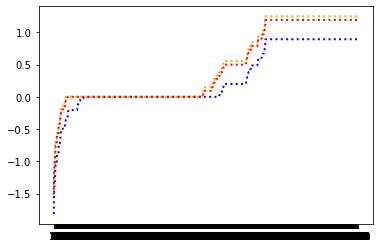

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 

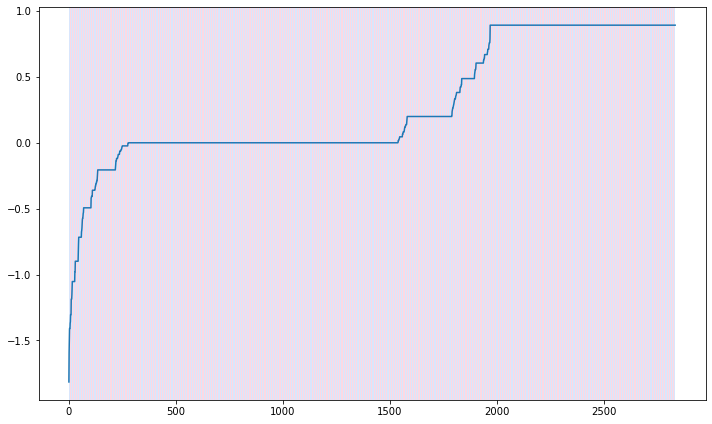

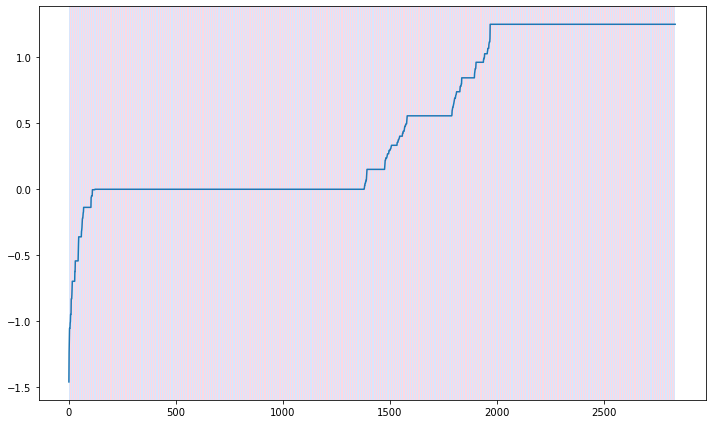

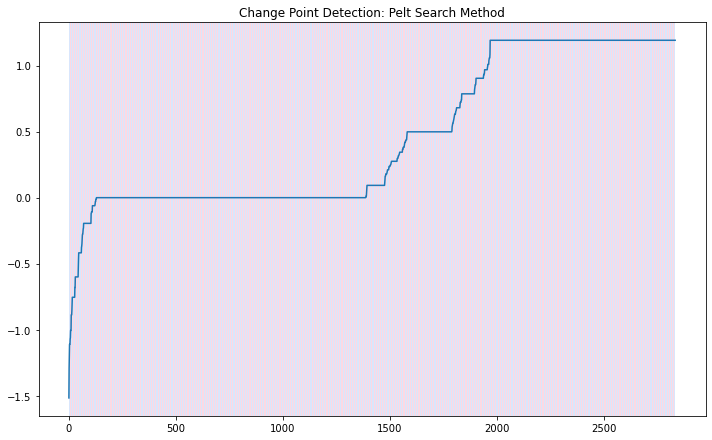

In [4]:
import matplotlib.pyplot as plt
x_data = df_PMI_V_x.tolist()
y_data = sorted(df_PMI_V_L.tolist())
y_data2 = sorted(df_PMI_V_M.tolist())
y_data3 = sorted(df_PMI_V_H.tolist())

plt.plot(x_data,y_data,color='blue',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data2,color='orange',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data3,color='red',linewidth=2.0,linestyle=':')

plt.savefig('PMI_V.png')
plt.show()
plt.close()
points_list = [y_data,y_data2,y_data3]
result_P_V_list = []
model="rbf"
for point in points_list:
    points = np.array(point)
    algo = rpt.Pelt(model=model).fit(points)
    result = algo.predict(pen=0)
    result_P_V_list.append(result)
    print(result)
    rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()
plt.close()

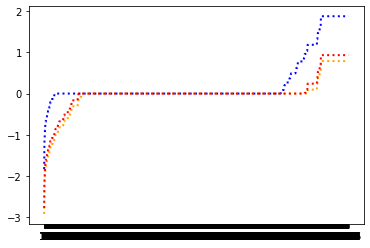

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 

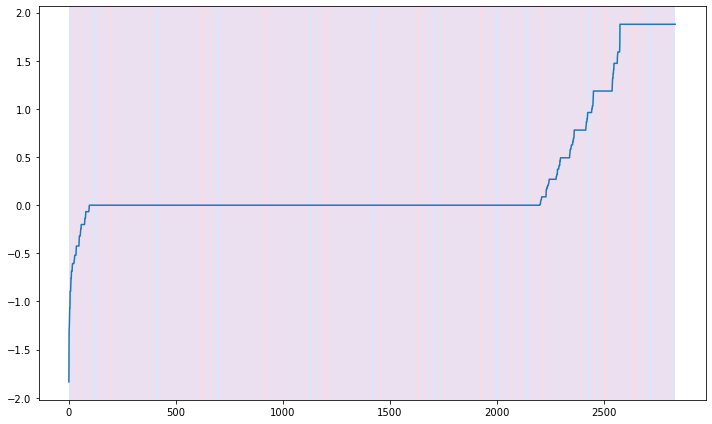

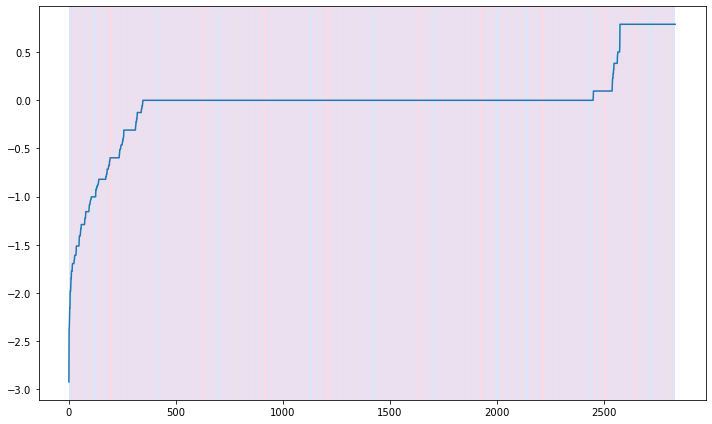

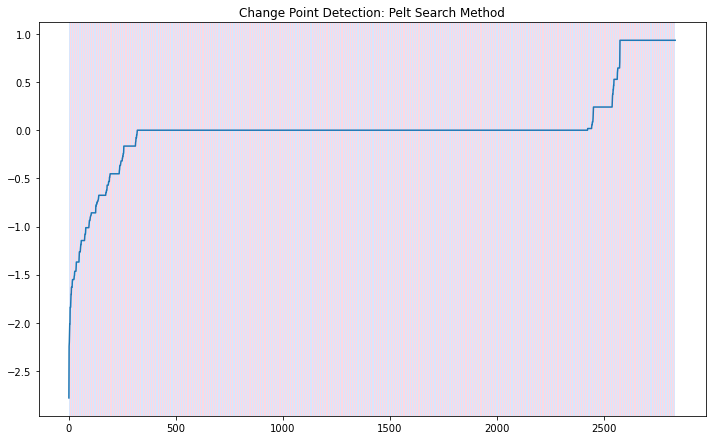

In [9]:
x_data = df_PMI_A_x.tolist()
y_data = sorted(df_PMI_A_L.tolist())
y_data2 = sorted(df_PMI_A_M.tolist())
y_data3 = sorted(df_PMI_A_H.tolist())

plt.plot(x_data,y_data,color='blue',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data2,color='orange',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data3,color='red',linewidth=2.0,linestyle=':')

plt.savefig('PMI_A.png')
plt.show()
plt.close()
points_list = [y_data,y_data2,y_data3]
result_P_A_list = []

model="rbf"
for point in points_list:
    points = np.array(point)
    algo = rpt.Pelt(model=model).fit(points)
    result = algo.predict(pen=0)
    result_P_A_list.append(result)
    print(result)
    rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()
plt.close()

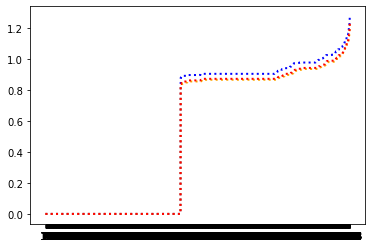

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 

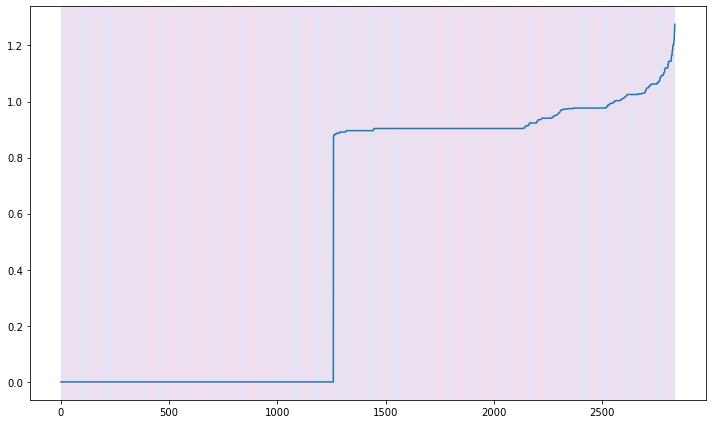

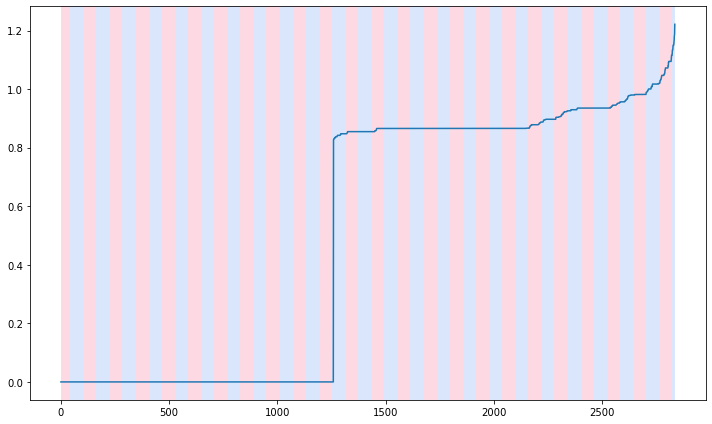

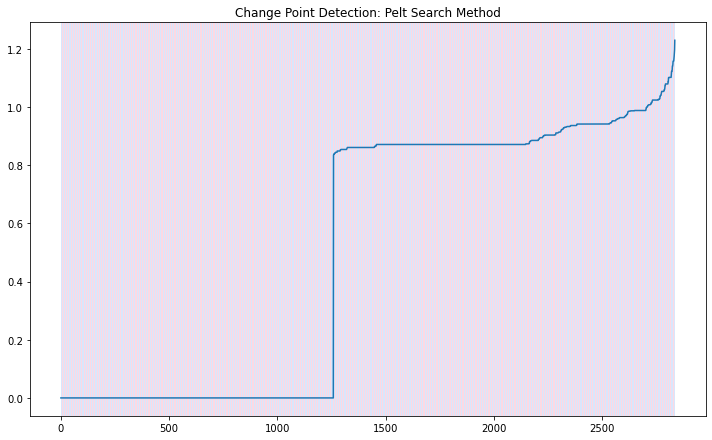

In [10]:
import matplotlib.pyplot as plt
x_data = df_NGD_V_x.tolist()
y_data = sorted(df_NGD_V_L.tolist())
y_data2 = sorted(df_NGD_V_M.tolist())
y_data3 = sorted(df_NGD_V_H.tolist())

plt.plot(x_data,y_data,color='blue',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data2,color='orange',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data3,color='red',linewidth=2.0,linestyle=':')

plt.savefig('NGD_V.png')
plt.show()
plt.close()
points_list = [y_data,y_data2,y_data3]

result_N_V_list = []

model="rbf"
for point in points_list:
    points = np.array(point)
    algo = rpt.Pelt(model=model).fit(points)
    result = algo.predict(pen=0)
    result_N_V_list.append(result)
    print(result)
    rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()
plt.close()

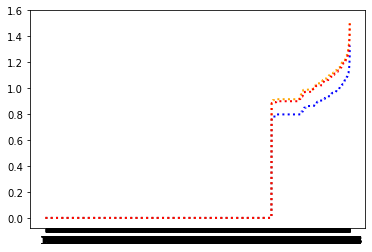

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 

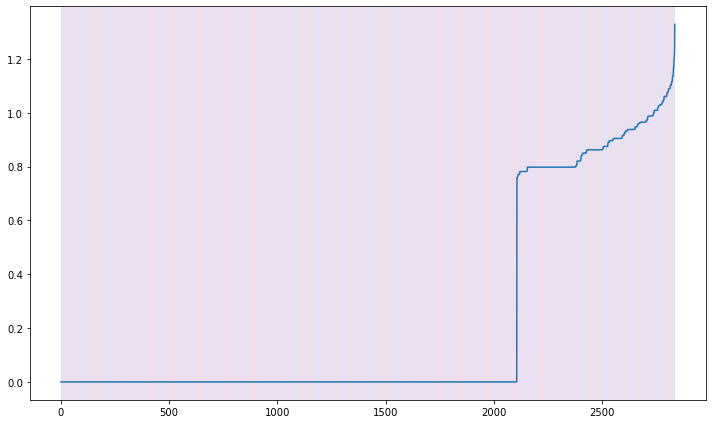

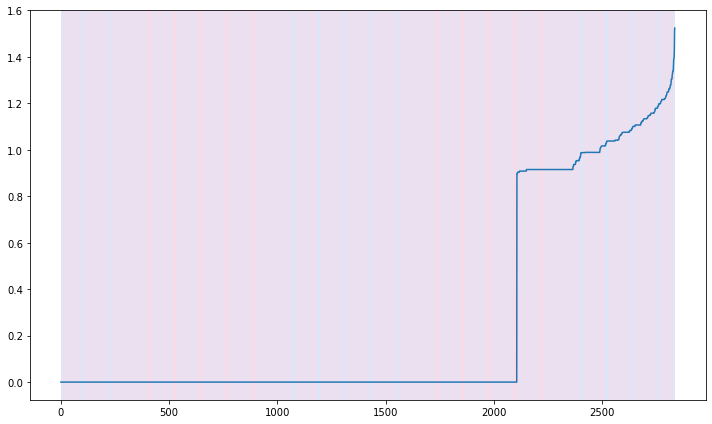

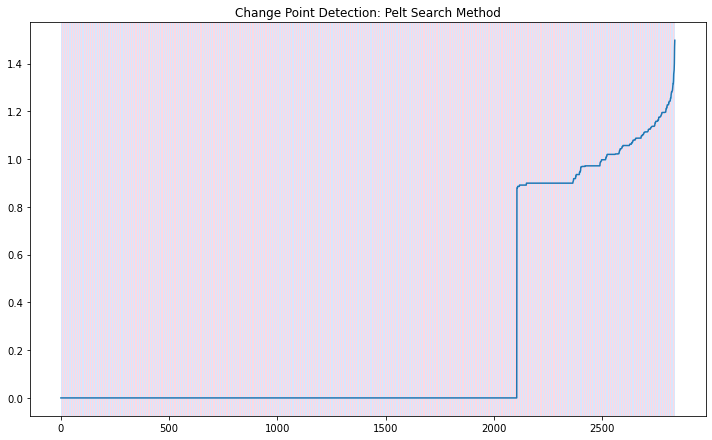

In [11]:
x_data = df_NGD_A_x.tolist()
y_data = sorted(df_NGD_A_L.tolist())
y_data2 = sorted(df_NGD_A_M.tolist())
y_data3 = sorted(df_NGD_A_H.tolist())

plt.plot(x_data,y_data,color='blue',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data2,color='orange',linewidth=2.0,linestyle=':')
plt.plot(x_data,y_data3,color='red',linewidth=2.0,linestyle=':')

plt.savefig('NGD_A.png')
plt.show()
plt.close()
points_list = [y_data,y_data2,y_data3]
result_N_A_list = []

model="rbf"
for point in points_list:
    points = np.array(point)
    algo = rpt.Pelt(model=model).fit(points)
    result = algo.predict(pen=0)
    result_N_A_list.append(result)
    print(result)
    rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()
plt.close()

In [12]:
print(result_P_V_list)
print(result_P_A_list)
print(result_N_V_list)
print(result_N_A_list)

[[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015,